# PM hw 02

최재필

## Q1. Summarize

textbook을 읽긴 했는데 이해 안되는 부분이 많아 요약은 못했네요.. 

추후 정리해 올려보도록 하겠습니다. 

## Q2 Implementing in Python

The given CSV file contains adjusted closing price data for the top 10 market capitalization stocks on the NASDAQ. The data ranges from January 2, 2020, to June 30, 2023.


In [15]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
from pathlib import Path

In [17]:
import scipy

from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

import sympy as sp
from sympy.abc import w

In [18]:
## custom library 

import eda_utils as eutils

In [19]:
CWD_PATH = Path('.').resolve() # relative path

DATA_PATH = CWD_PATH / 'data'

In [20]:
nasdaq_df = pd.read_csv(DATA_PATH / 'nasdaq10.csv')
nasdaq_df['Date'] = pd.to_datetime(nasdaq_df['Date'])
nasdaq_df.set_index('Date', inplace=True)
nasdaq_df

,AAPL,MSFT,AMZN,NVDA,GOOGL,TSLA,META,GOOG,AVGO,ASML
Date,,,,,,,,,,
2020-01-02,73.25,155.42,94.90,59.75,68.43,28.68,209.78,68.37,286.49,292.54
2020-01-03,72.54,153.49,93.75,58.80,68.08,29.53,208.67,68.03,279.20,287.83
2020-01-06,73.11,153.88,95.14,59.04,69.89,30.10,212.60,69.71,278.78,285.54
2020-01-07,72.77,152.48,95.34,59.76,69.76,31.27,213.06,69.67,277.82,288.64
2020-01-08,73.94,154.91,94.60,59.87,70.25,32.81,215.22,70.22,274.36,291.63
...,...,...,...,...,...,...,...,...,...,...
2023-06-23,186.43,335.02,129.33,422.09,122.34,256.60,288.73,123.02,822.15,696.30
2023-06-26,185.02,328.60,127.33,406.32,118.34,241.05,278.47,119.09,821.63,698.65
2023-06-27,187.81,334.57,129.18,418.76,118.33,250.21,287.05,119.01,848.40,723.43


### (a) 

Calculate Daily Returns of each Stocks

`.pct_change()` 와 log 차분 으로 각각 return을 구할 때의 속도 차이 거의 없음

In [21]:
%%timeit -r 2 -n 1000

return_df = nasdaq_df.pct_change()
return_df = return_df.iloc[1:, :]

324 µs ± 14.3 µs per loop (mean ± std. dev. of 2 runs, 1,000 loops each)


In [22]:
return_df = nasdaq_df.pct_change()
return_df = return_df.iloc[1:, :]

In [23]:
return_df

,AAPL,MSFT,AMZN,NVDA,GOOGL,TSLA,META,GOOG,AVGO,ASML
Date,,,,,,,,,,
2020-01-03,-0.009693,-0.012418,-0.012118,-0.015900,-0.005115,0.029637,-0.005291,-0.004973,-0.025446,-0.016100
2020-01-06,0.007858,0.002541,0.014827,0.004082,0.026586,0.019302,0.018834,0.024695,-0.001504,-0.007956
2020-01-07,-0.004651,-0.009098,0.002102,0.012195,-0.001860,0.038870,0.002164,-0.000574,-0.003444,0.010857
2020-01-08,0.016078,0.015937,-0.007762,0.001841,0.007024,0.049248,0.010138,0.007894,-0.012454,0.010359
2020-01-09,0.021233,0.012459,0.004757,0.011024,0.010534,-0.021945,0.014311,0.010966,-0.008055,-0.001680
...,...,...,...,...,...,...,...,...,...,...
2023-06-23,-0.001714,-0.013806,-0.006300,-0.018966,-0.006577,-0.030271,0.013514,-0.006862,-0.024073,-0.027215
2023-06-26,-0.007563,-0.019163,-0.015464,-0.037362,-0.032696,-0.060600,-0.035535,-0.031946,-0.000632,0.003375
2023-06-27,0.015079,0.018168,0.014529,0.030616,-0.000085,0.038000,0.030811,-0.000672,0.032582,0.035468


In [24]:
%%timeit -r 2 -n 1000

return_df = np.exp(np.log(nasdaq_df) - np.log(nasdaq_df.shift(1))) - 1
return_df = return_df.iloc[1:, :]

414 µs ± 4.58 µs per loop (mean ± std. dev. of 2 runs, 1,000 loops each)


In [25]:
return_df = np.exp(np.log(nasdaq_df) - np.log(nasdaq_df.shift(1))) - 1
return_df = return_df.iloc[1:, :]

In [26]:
return_df

,AAPL,MSFT,AMZN,NVDA,GOOGL,TSLA,META,GOOG,AVGO,ASML
Date,,,,,,,,,,
2020-01-03,-0.009693,-0.012418,-0.012118,-0.015900,-0.005115,0.029637,-0.005291,-0.004973,-0.025446,-0.016100
2020-01-06,0.007858,0.002541,0.014827,0.004082,0.026586,0.019302,0.018834,0.024695,-0.001504,-0.007956
2020-01-07,-0.004651,-0.009098,0.002102,0.012195,-0.001860,0.038870,0.002164,-0.000574,-0.003444,0.010857
2020-01-08,0.016078,0.015937,-0.007762,0.001841,0.007024,0.049248,0.010138,0.007894,-0.012454,0.010359
2020-01-09,0.021233,0.012459,0.004757,0.011024,0.010534,-0.021945,0.014311,0.010966,-0.008055,-0.001680
...,...,...,...,...,...,...,...,...,...,...
2023-06-23,-0.001714,-0.013806,-0.006300,-0.018966,-0.006577,-0.030271,0.013514,-0.006862,-0.024073,-0.027215
2023-06-26,-0.007563,-0.019163,-0.015464,-0.037362,-0.032696,-0.060600,-0.035535,-0.031946,-0.000632,0.003375
2023-06-27,0.015079,0.018168,0.014529,0.030616,-0.000085,0.038000,0.030811,-0.000672,0.032582,0.035468


### (b) 

Calculate 1) Min 2) Max 3) Mean 4) Variance 5) Skewness 6) Kurtosis of each Stocks

EDA용 custom library 사용

In [27]:
STATS = ['min', 'max', 'mean', 'var', 'skew', 'kurt']

eutils.Stats.pd_statistics(return_df, STATS)

,AAPL,MSFT,AMZN,NVDA,GOOGL,TSLA,META,GOOG,AVGO,ASML
min,-0.128624,-0.147362,-0.140526,-0.184439,-0.116291,-0.210628,-0.263901,-0.111002,-0.199145,-0.173471
max,0.119809,0.142148,0.135326,0.243688,0.092299,0.198985,0.232824,0.093991,0.158332,0.145739
mean,0.001327,0.001104,0.000636,0.002815,0.000865,0.003490,0.000818,0.000874,0.001563,0.001426
var,0.000491,0.000457,0.000592,0.001260,0.000468,0.001976,0.000947,0.000466,0.000608,0.000794
skew,0.079509,0.032623,0.076185,0.416857,-0.034201,0.053096,-0.566572,-0.023852,-0.380431,-0.067330
kurt,4.421268,6.189175,3.686687,4.094589,2.866986,2.685215,16.095620,2.870773,10.129327,3.020340


또는 `scipy.stats`를 사용해도 됨. 

In [28]:
scipy_stats = scipy.stats.describe(return_df.iloc[1:, :])

In [29]:
print(f'''
minmax = {scipy_stats.minmax}

mean = {scipy_stats.mean}

variance = {scipy_stats.variance}

skewness = {scipy_stats.skewness}

kurtosis = {scipy_stats.kurtosis}
''')


minmax = (array([-0.12862399, -0.14736227, -0.14052559, -0.18443852, -0.11629056,
       -0.21062823, -0.26390093, -0.1110018 , -0.19914481, -0.17347116]), array([0.11980883, 0.14214778, 0.13532589, 0.24368757, 0.09229939,
       0.19898547, 0.23282393, 0.09399103, 0.15833222, 0.14573857]))

mean = [0.00133984 0.00111926 0.00065028 0.00283635 0.00087227 0.00346014
 0.00082483 0.00088057 0.00159351 0.00144632]

variance = [0.00049163 0.00045779 0.00059277 0.00126136 0.0004688  0.0019776
 0.00094823 0.00046643 0.00060834 0.00079443]

skewness = [ 0.07780078  0.03069594  0.07441885  0.41446863 -0.03504847  0.05478662
 -0.56598997 -0.02470501 -0.38259306 -0.06907462]

kurtosis = [ 4.38480795  6.14481024  3.65522227  4.05982842  2.83825785  2.66115014
 15.97785999  2.84196713 10.0860804   2.99482921]



### (c) 

Try Normalization and Draw Normal Distribution Graph of each Stocks

#### normalization

`sklearn` 사용

In [30]:
scaler = StandardScaler()

stdnorm_returns = scaler.fit_transform(return_df)

In [31]:
stdnorm_return_df = pd.DataFrame(index=return_df.index, columns=return_df.columns, data=stdnorm_returns)

#### z-score dist

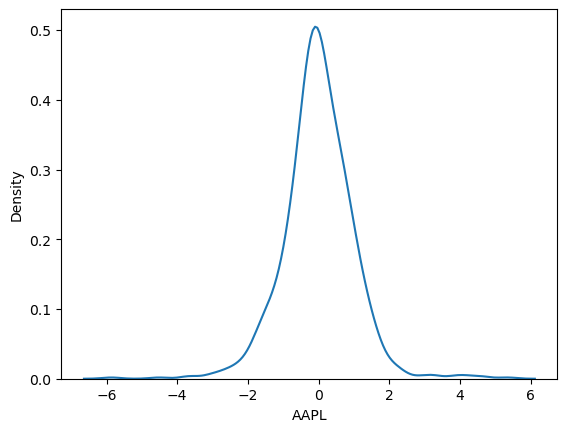

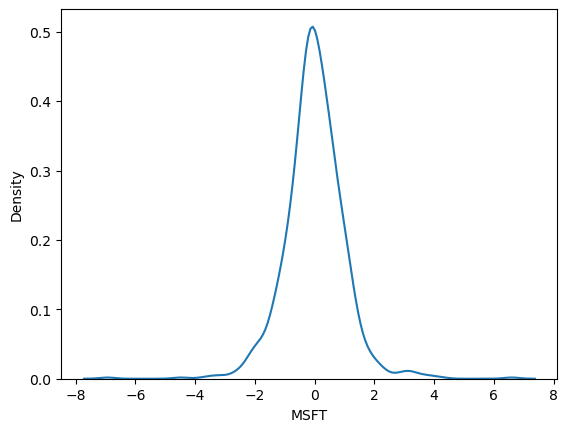

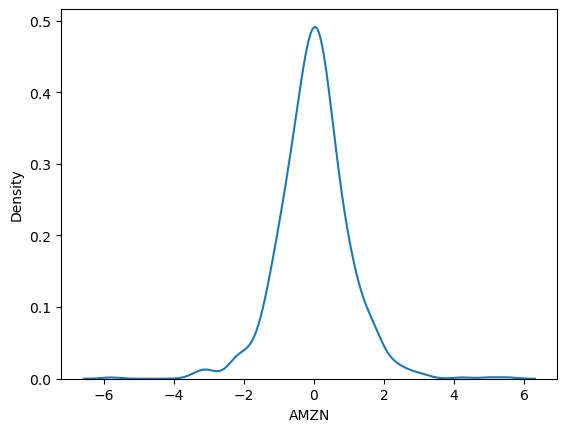

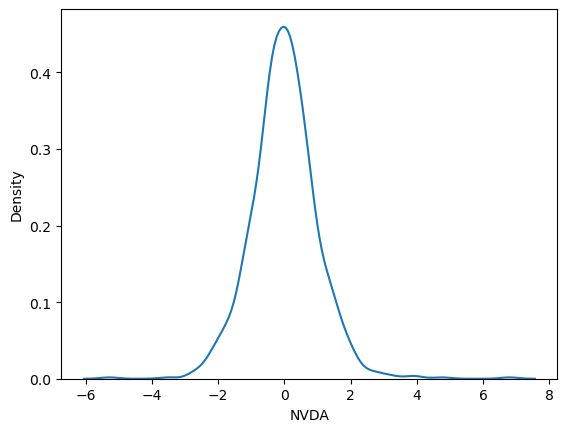

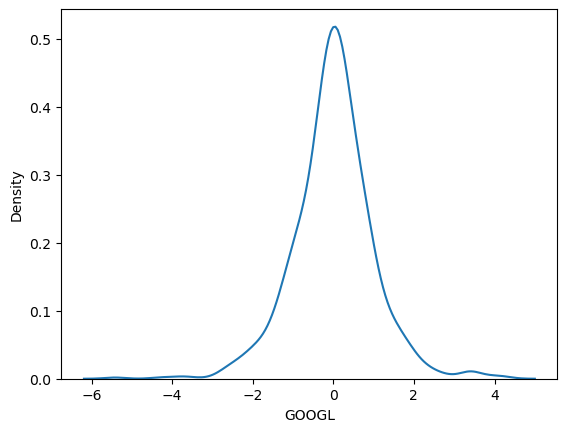

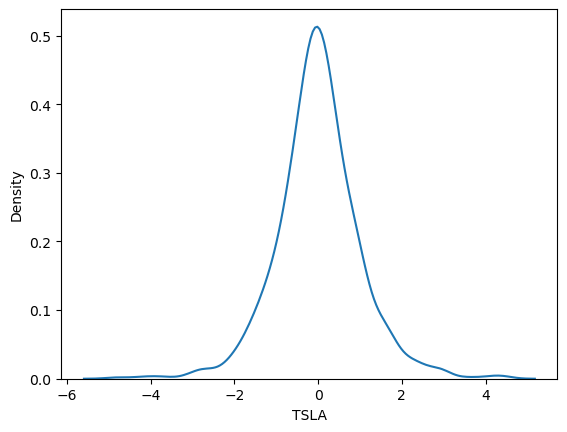

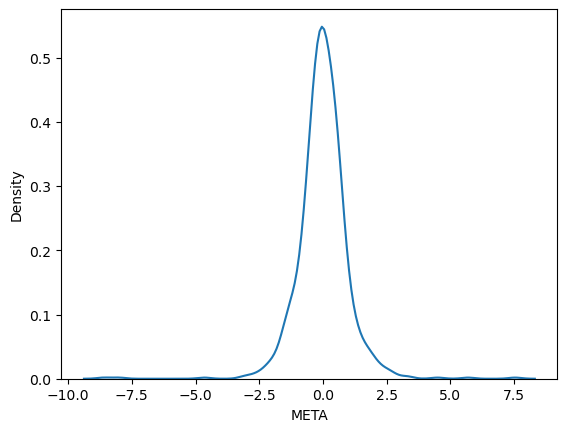

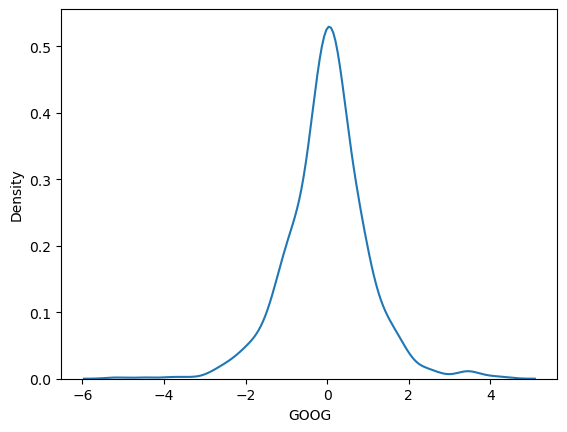

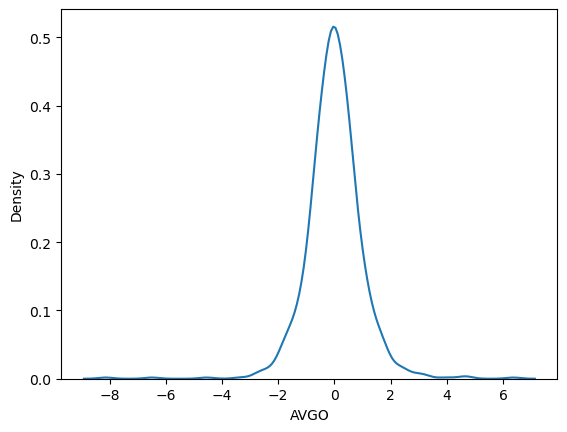

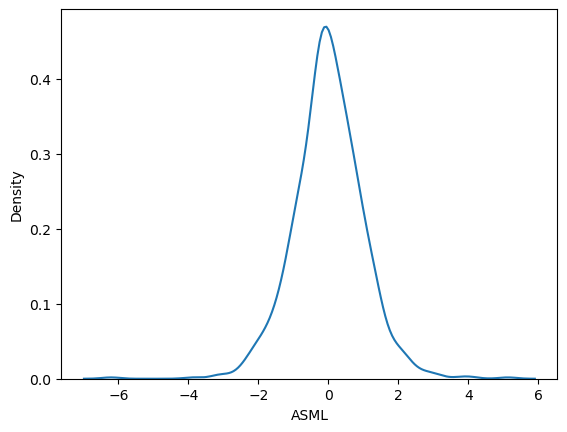

In [33]:
sid_list = return_df.columns

for ii in sid_list:
    sns.kdeplot(stdnorm_return_df.loc[:, ii])
    plt.show()

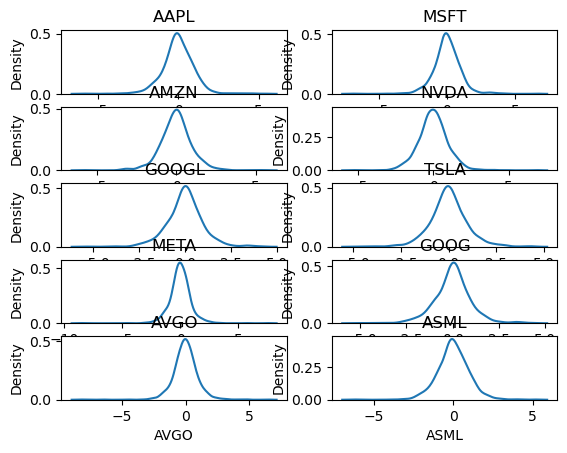

In [34]:
## 한 번에 표시는 되는데 너무 작아서 잘 안보임

fig, axes = plt.subplots(5, 2)
ax_coords = [(i, j) for i in range(5) for j in range(2)]

for idx, ii in enumerate(sid_list):
    sns.kdeplot(stdnorm_return_df.loc[:, ii], ax=axes[ax_coords[idx]]).set(title=ii) ## title이 plt에서 아래로 한 번, sns에서 위로 한 번 더 나오고 있음

### (d) 

Draw QQ-Plots of 10 Stocks and Assess Normality of Returns of each Stocks

#### QQ plots

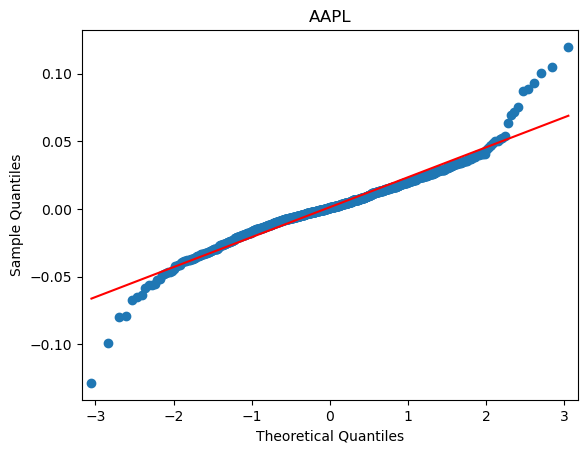

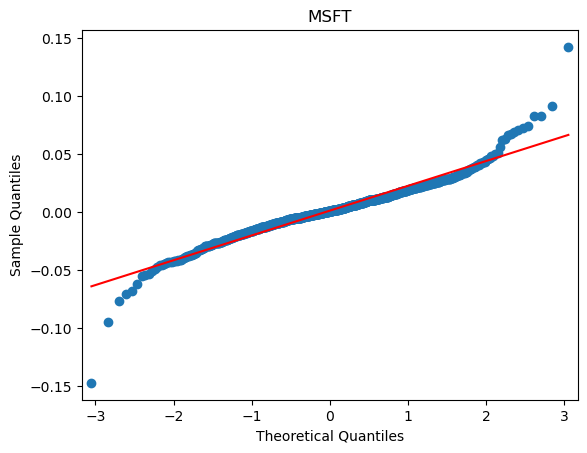

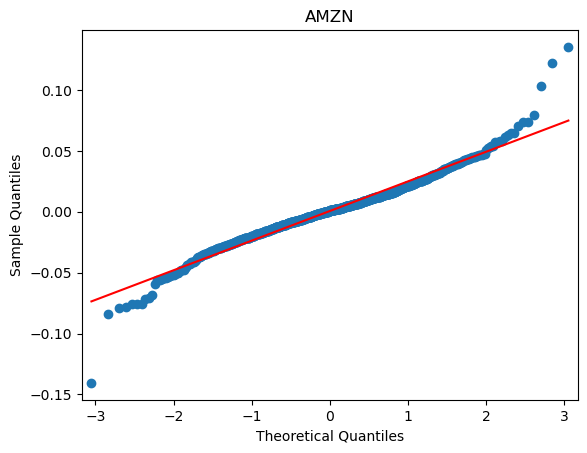

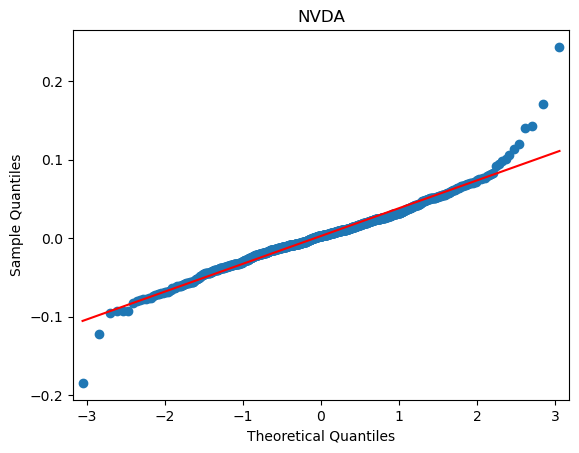

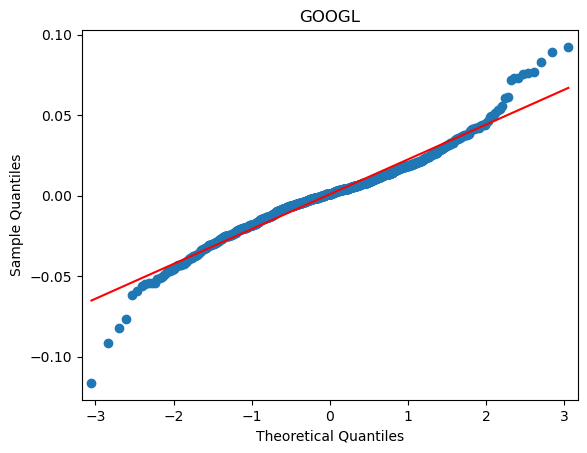

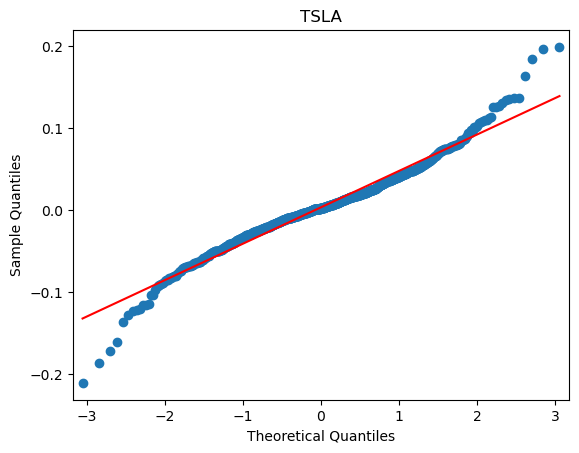

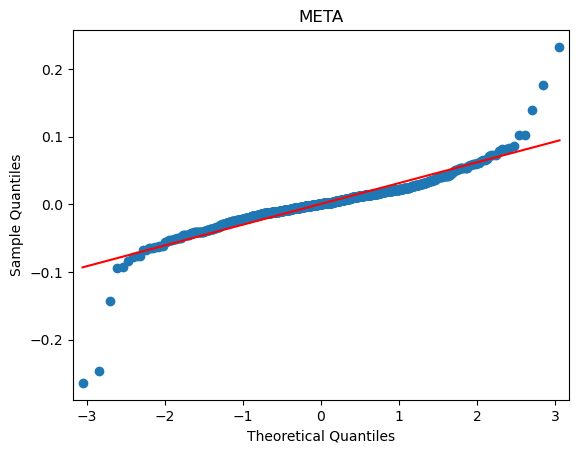

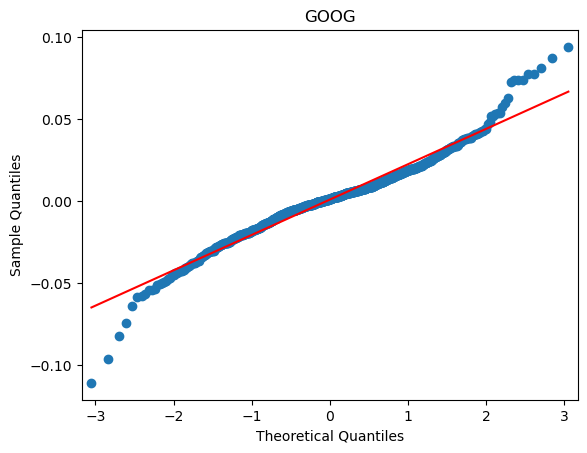

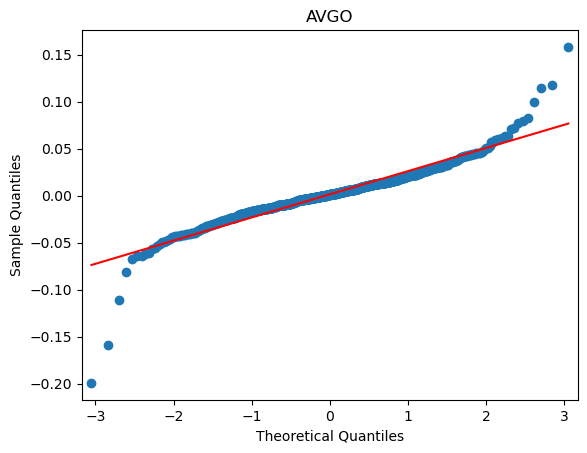

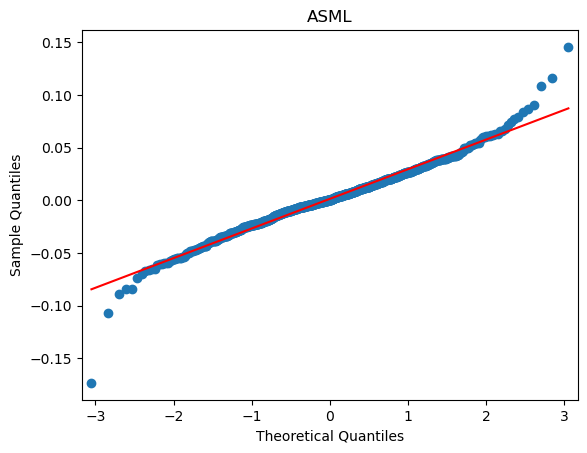

In [35]:
for ii in sid_list:
    sm.qqplot(return_df.loc[:, ii], line='s')
    plt.title(ii)
    plt.show()

#### Normality Tests

##### 1. Parzen and Rosenblatt

##### 2. Kolmogorov-Smirnov Test (KS Test)

##### 3. Shapiro-Wilk Test

Uses QQ Plot

In [36]:
alpha = 0.05

print(f'''
Result of Shapiro-Wilk test for normality

H0: The returns are normally distributed
alpha: {alpha}
===========================================
''')

ii2results = {}

for ii in sid_list:
    SW_stats, SW_p = scipy.stats.shapiro(return_df.loc[:, ii])

    if SW_p > alpha:
        result = 'Fail to reject H0 (We can\'t say that the return distribution is not normal)'
        ii2results[ii] = 'normal'
    else:
        result = 'Reject H0 (The return distribution is probably not normal)'
        ii2results[ii] = 'not normal'
    
    print(f'''
Test of {ii} returns
Result: {result}
Shapiro-Wilk test statistic: {SW_stats:.4f}
p-value: {SW_p:.4f}
''')




Result of Shapiro-Wilk test for normality

H0: The returns are normally distributed
alpha: 0.05


Test of AAPL returns
Result: Reject H0 (The return distribution is probably not normal)
Shapiro-Wilk test statistic: 0.9506
p-value: 0.0000


Test of MSFT returns
Result: Reject H0 (The return distribution is probably not normal)
Shapiro-Wilk test statistic: 0.9413
p-value: 0.0000


Test of AMZN returns
Result: Reject H0 (The return distribution is probably not normal)
Shapiro-Wilk test statistic: 0.9633
p-value: 0.0000


Test of NVDA returns
Result: Reject H0 (The return distribution is probably not normal)
Shapiro-Wilk test statistic: 0.9657
p-value: 0.0000


Test of GOOGL returns
Result: Reject H0 (The return distribution is probably not normal)
Shapiro-Wilk test statistic: 0.9655
p-value: 0.0000


Test of TSLA returns
Result: Reject H0 (The return distribution is probably not normal)
Shapiro-Wilk test statistic: 0.9671
p-value: 0.0000


Test of META returns
Result: Reject H0 (The retu

In [37]:
ii2results

{'AAPL': 'not normal',
 'MSFT': 'not normal',
 'AMZN': 'not normal',
 'NVDA': 'not normal',
 'GOOGL': 'not normal',
 'TSLA': 'not normal',
 'META': 'not normal',
 'GOOG': 'not normal',
 'AVGO': 'not normal',
 'ASML': 'not normal'}

### (e) 

Calculate Covariance Matrix for 10 Stocks and Visualize Using Heatmap.

In [38]:
return_df.cov()

,AAPL,MSFT,AMZN,NVDA,GOOGL,TSLA,META,GOOG,AVGO,ASML
AAPL,0.000491,0.000375,0.000349,0.000533,0.000341,0.000511,0.000418,0.000339,0.000372,0.000404
MSFT,0.000375,0.000457,0.000362,0.000558,0.000373,0.000456,0.000417,0.000370,0.000371,0.000416
AMZN,0.000349,0.000362,0.000592,0.000531,0.000355,0.000501,0.000461,0.000356,0.000324,0.000393
NVDA,0.000533,0.000558,0.000531,0.001260,0.000508,0.000837,0.000614,0.000503,0.000625,0.000749
GOOGL,0.000341,0.000373,0.000355,0.000508,0.000468,0.000419,0.000459,0.000465,0.000340,0.000391
TSLA,0.000511,0.000456,0.000501,0.000837,0.000419,0.001976,0.000495,0.000418,0.000545,0.000619
META,0.000418,0.000417,0.000461,0.000614,0.000459,0.000495,0.000947,0.000459,0.000399,0.000468
GOOG,0.000339,0.000370,0.000356,0.000503,0.000465,0.000418,0.000459,0.000466,0.000334,0.000385
AVGO,0.000372,0.000371,0.000324,0.000625,0.000340,0.000545,0.000399,0.000334,0.000608,0.000534
ASML,0.000404,0.000416,0.000393,0.000749,0.000391,0.000619,0.000468,0.000385,0.000534,0.000794


<Axes: >

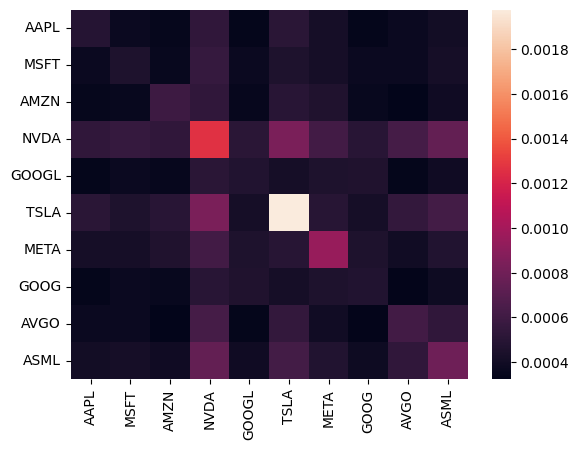

In [39]:
# sns.heatmap(return_df.cov(), annot=True, fmt='.3f') # 소수점이 작아서 다 삐져나감.
sns.heatmap(return_df.cov())

## Q3. Problem

### Problem 1. Two correlated Assets

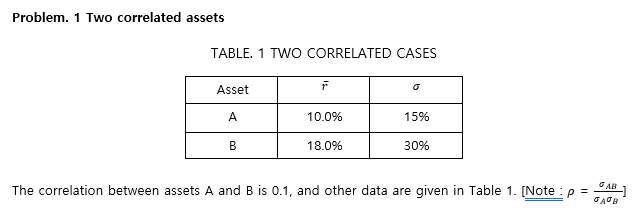

In [40]:
corr = 0.1

ret_A = 0.1
ret_B = 0.18

std_A = 0.15
std_B = 0.30

In [41]:
cov_AB = corr * std_A * std_B

#### (a)

Find the proportions α of A and (1- α) of B that define a portfolio of A and B having minimum standard deviation. 

In [42]:
# w is weight = alpha, as sympy symbol

port_var_expr = w**2 * std_A**2 \
     + (1-w)**2 * std_B**2 \
         + 2 * w * (1-w) * cov_AB

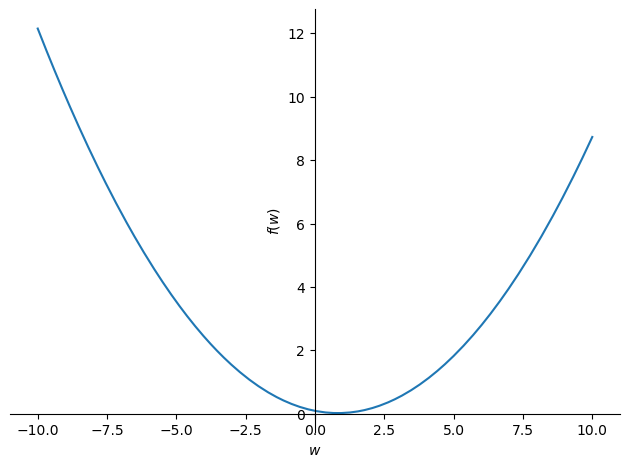

In [43]:
sp.plot(port_var_expr)

In [44]:
w_star = sp.calculus.util.minimum(port_var_expr, w)
w_star

0.0193695652173913

#### (b)

What is the value of this minimum standard deviation?

In [45]:
# plug in w* to the expression 

port_var_expr.subs(w, w_star)

0.0867266354836956

#### (c)

What is the expected return of this portfolio? 

In [46]:
w_star * ret_A + (1-w_star) * ret_B

0.178450434782609

### Problem 2. Two Stocks

Two stocks are available. The corresponding expected rates of return are  $ \bar{r}_1 $ and $ \bar{r}_2 $ the corresponding variances and covariances are $ \sigma_1^2 $, $ \sigma_2^2 $ and $ \sigma_{12} $

#### (a)

What percentages of total investment should be invested in each of the two stocks to minimize the total variance of the rate of return of the resulting portfolio? 

#### (b)

(b) What is the mean rate of return of this portfolio? 